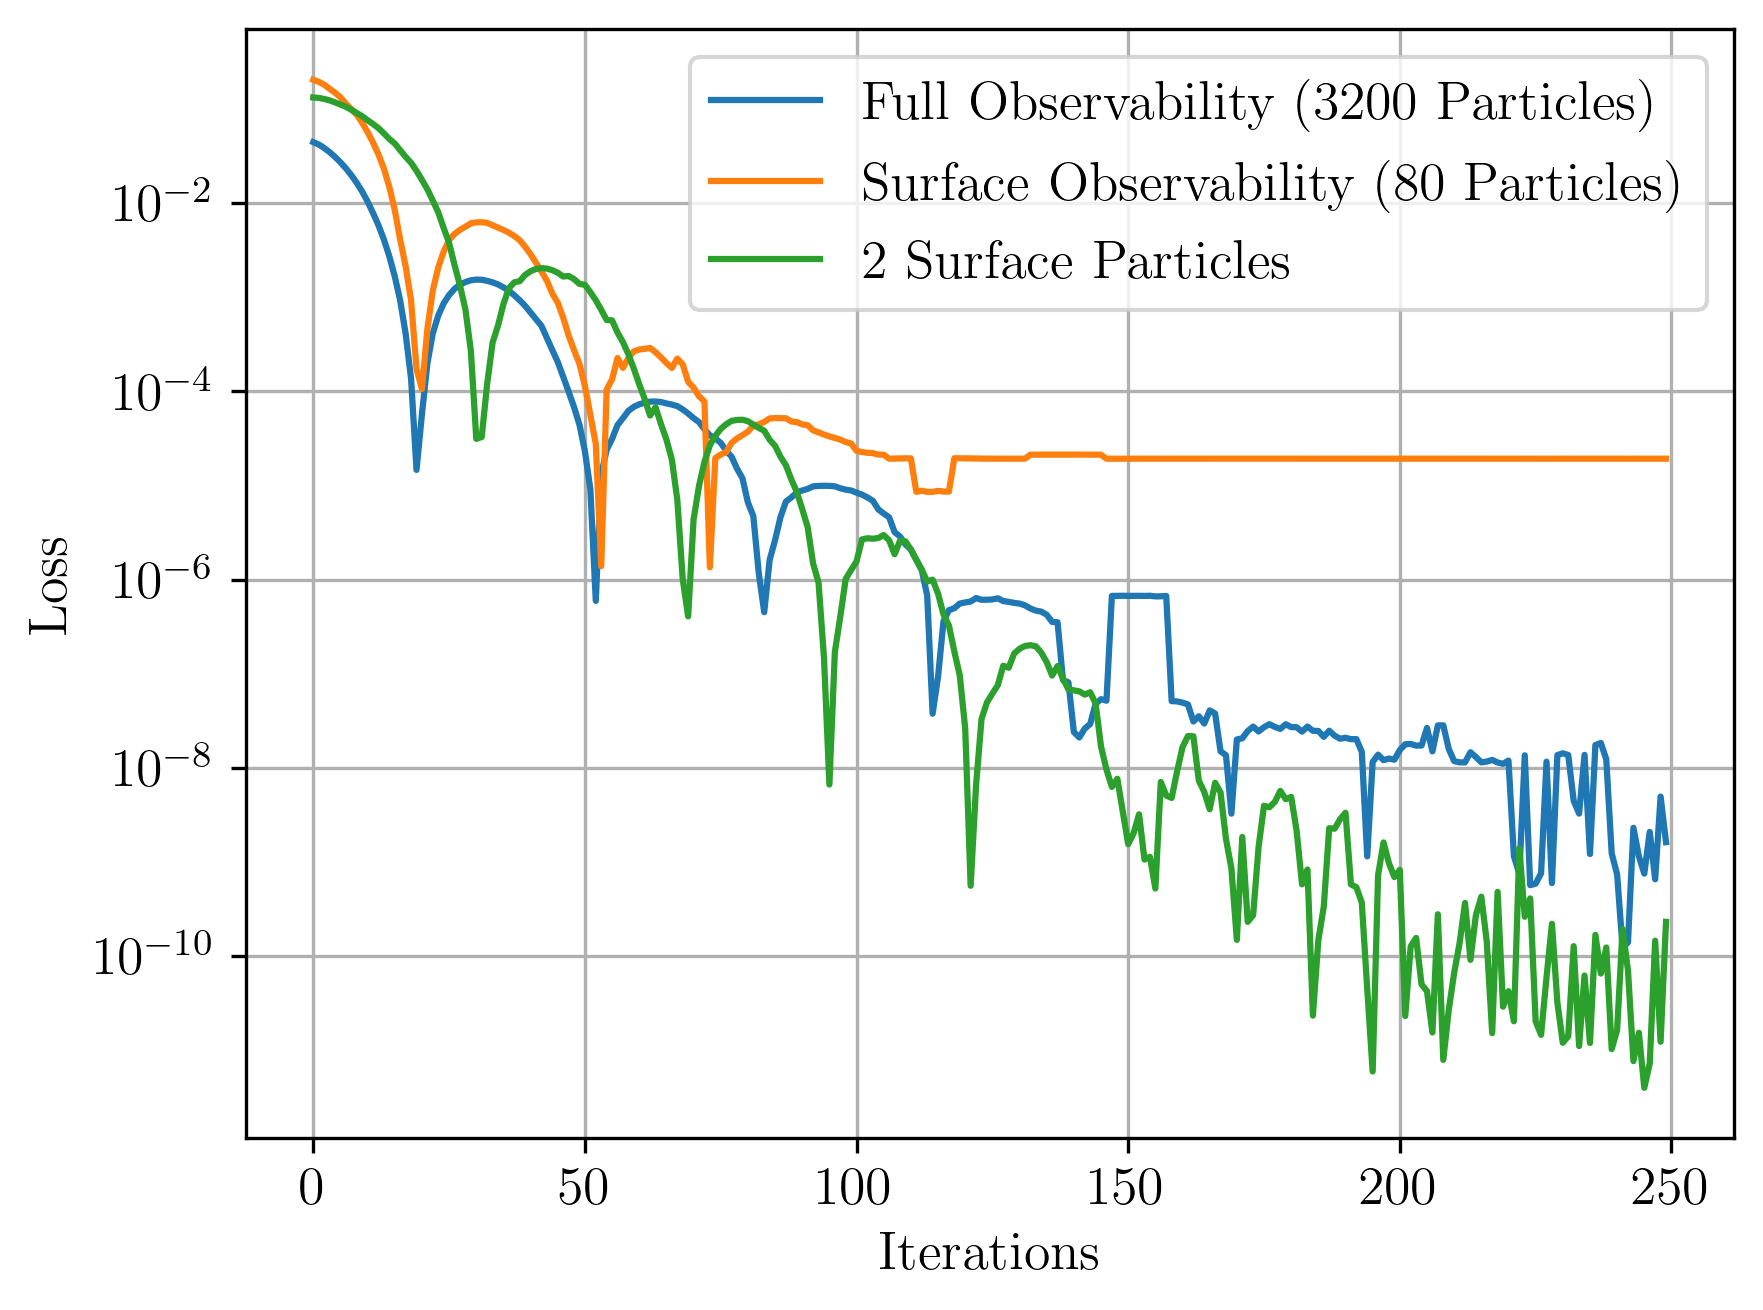

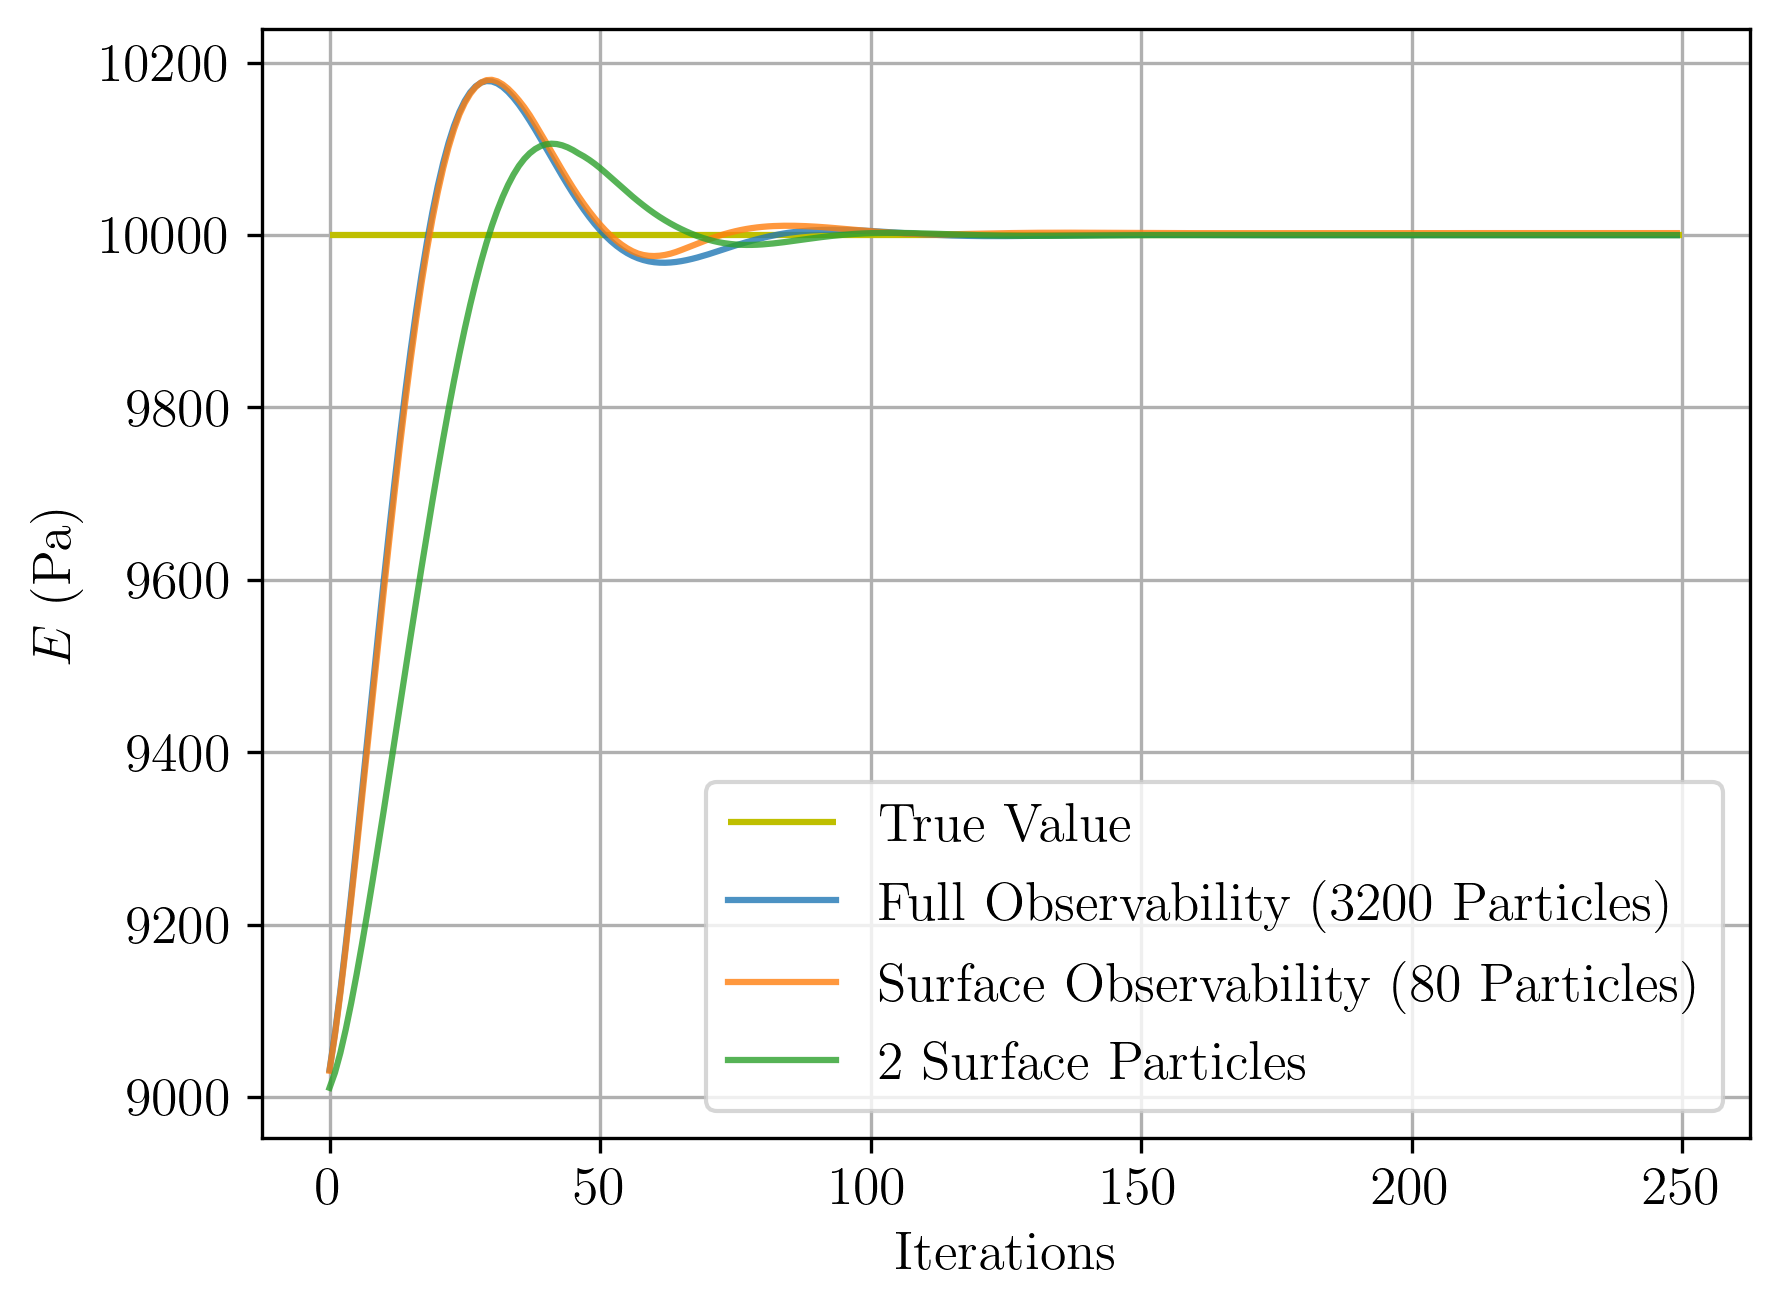

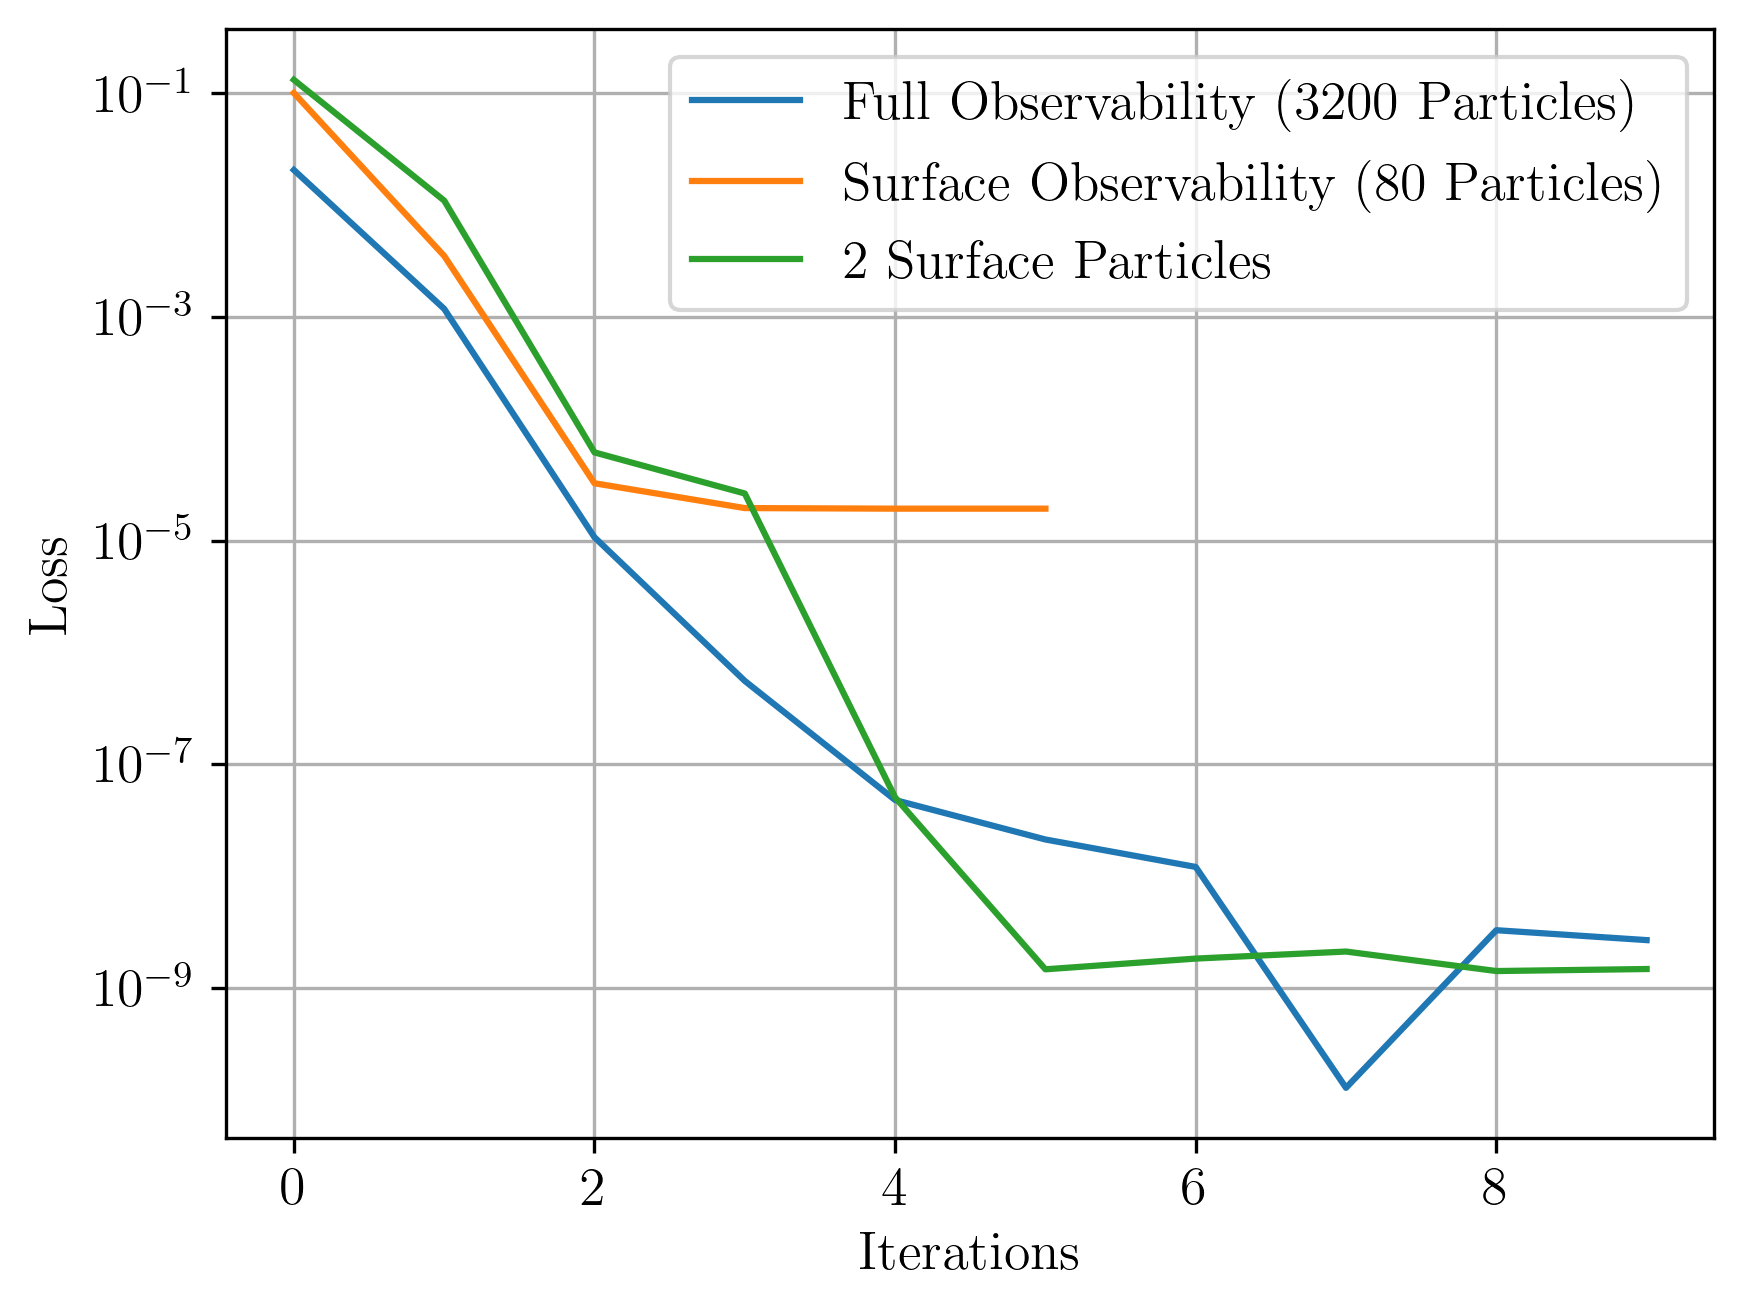

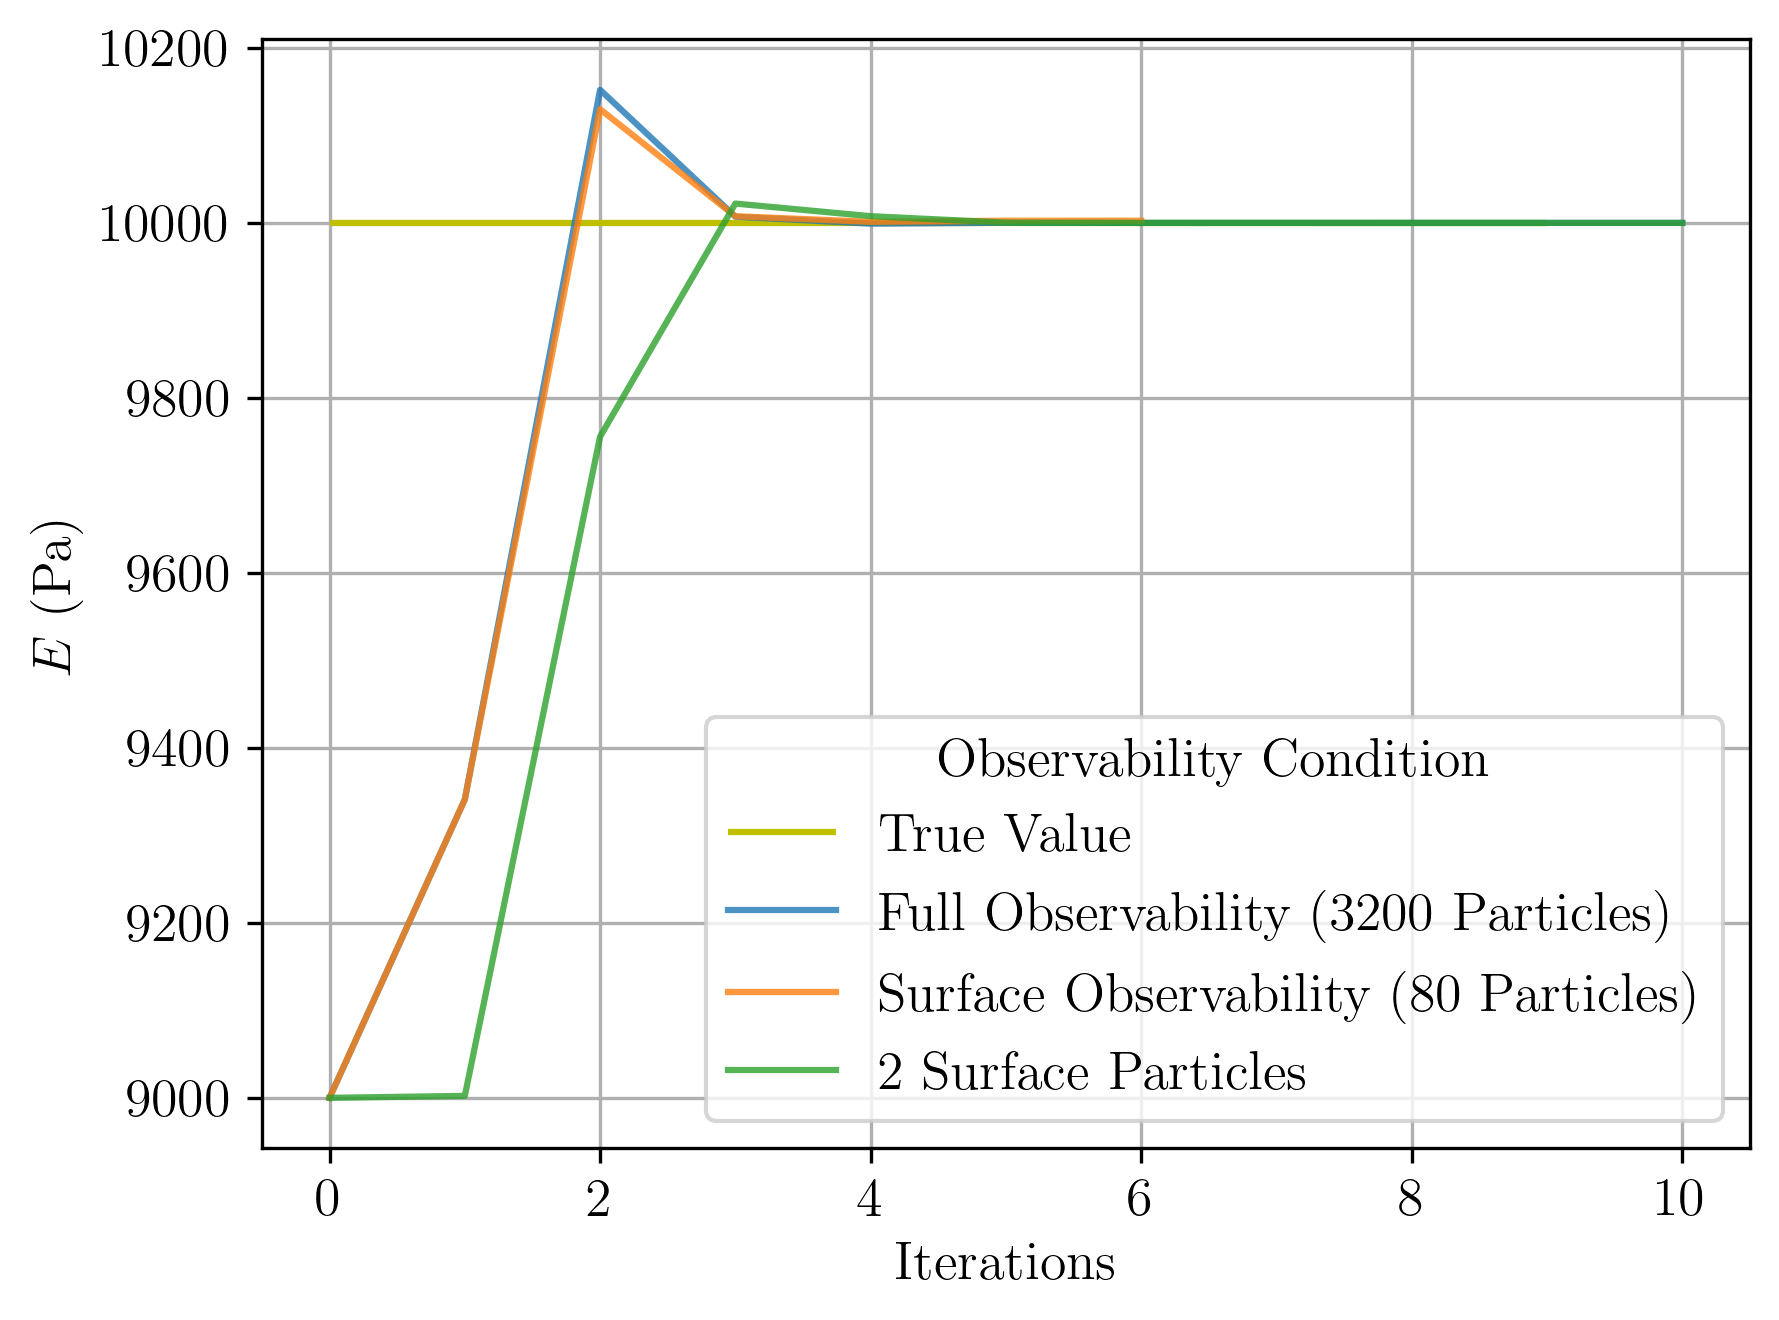

In [22]:
import matplotlib.pyplot as plt
import json
import numpy as np

with open('result_full_grad.json') as json_file:
    result_full_grad = json.load(json_file)
with open('result_bot_grad.json') as json_file:
    result_bot_grad = json.load(json_file)
with open('result_bot_y_grad.json') as json_file:
    result_bot_y_grad = json.load(json_file)
with open('result_half_y_grad.json') as json_file:
    result_half_y_grad = json.load(json_file)
with open('result_bot_x_grad.json') as json_file:
    result_bot_x_grad = json.load(json_file)
with open('result_half_x_grad.json') as json_file:
    result_half_x_grad = json.load(json_file)
with open('result_2_x_grad.json') as json_file:
    result_2_x_grad = json.load(json_file)

with open('result_full_lbfgs.json') as json_file:
    result_full_lbfgs = json.load(json_file)
with open('result_bot_lbfgs.json') as json_file:
    result_bot_lbfgs = json.load(json_file)
with open('result_bot_y_lbfgs.json') as json_file:
    result_bot_y_lbfgs = json.load(json_file)
with open('result_half_y_lbfgs.json') as json_file:
    result_half_y_lbfgs = json.load(json_file)
with open('result_bot_x_lbfgs.json') as json_file:
    result_bot_x_lbfgs = json.load(json_file)
with open('result_half_x_lbfgs.json') as json_file:
    result_half_x_lbfgs = json.load(json_file)
with open('result_2_x_lbfgs.json') as json_file:
    result_2_x_lbfgs = json.load(json_file)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 13}
matplotlib.rc('font', **font)

# plt.title("AMSGRAD Optimization of Homogeneous Beam Elastic Field")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.plot(result_full_grad['losses'], label='Full Observability (3200 Particles)')
# plt.plot(np.array(result_bot_grad['losses']) * 40, label='Bottom Row')
plt.plot(np.array(result_bot_x_grad['losses']) * 40, label='Surface Observability (80 Particles)')
plt.plot(np.array(result_2_x_grad['losses']) * 40 * 40 , label='2 Surface Particles')
plt.yscale('log')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# plt.title("Young's Modulus Learning Curve (AMSGrad)")
plt.ylabel("$E$ (Pa)")
plt.xlabel("Iterations")
plt.hlines(1e4, 0, 250, color='y', label='True Value')
plt.plot(result_full_grad['es'], label='Full Observability (3200 Particles)', alpha=0.8)
# plt.plot(result_bot_grad['es'], label='Bottom Row', alpha=0.8)
plt.plot(result_bot_x_grad['es'], label='Surface Observability (80 Particles)', alpha=0.8)
plt.plot(result_2_x_grad['es'], label='2 Surface Particles', alpha=0.8)
plt.legend()
plt.grid(True)
plt.show()

# plt.title("LBFGS-B Optimization of of Homogeneous Beam Elastic Field")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.plot(result_full_lbfgs['losses'], label='Full Observability (3200 Particles)')
# plt.plot(np.array(result_bot_lbfgs['losses']) * 40, label='Bottom Row')
plt.plot(np.array(result_bot_x_lbfgs['losses']) * 40, label='Surface Observability (80 Particles)')
plt.plot(np.array(result_2_x_lbfgs['losses']) * 40 * 40 , label='2 Surface Particles')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# plt.title("Young's Modulus Learning Curve (LBFGS-B)")
plt.ylabel("$E$ (Pa)")
plt.xlabel("Iterations")
plt.hlines(1e4, 0, 9, color='y', label='True Value')
plt.plot(result_full_lbfgs['es'], label='Full Observability (3200 Particles)', alpha=0.8)
# plt.plot(result_bot_lbfgs['es'], label='Bottom Row', alpha=0.8)
plt.plot(result_bot_x_lbfgs['es'], label='Surface Observability (80 Particles)', alpha=0.8)
plt.plot(result_2_x_lbfgs['es'], label='2 Surface Particles', alpha=0.8)
plt.legend(title='Observability Condition')
plt.grid(True)
plt.show()

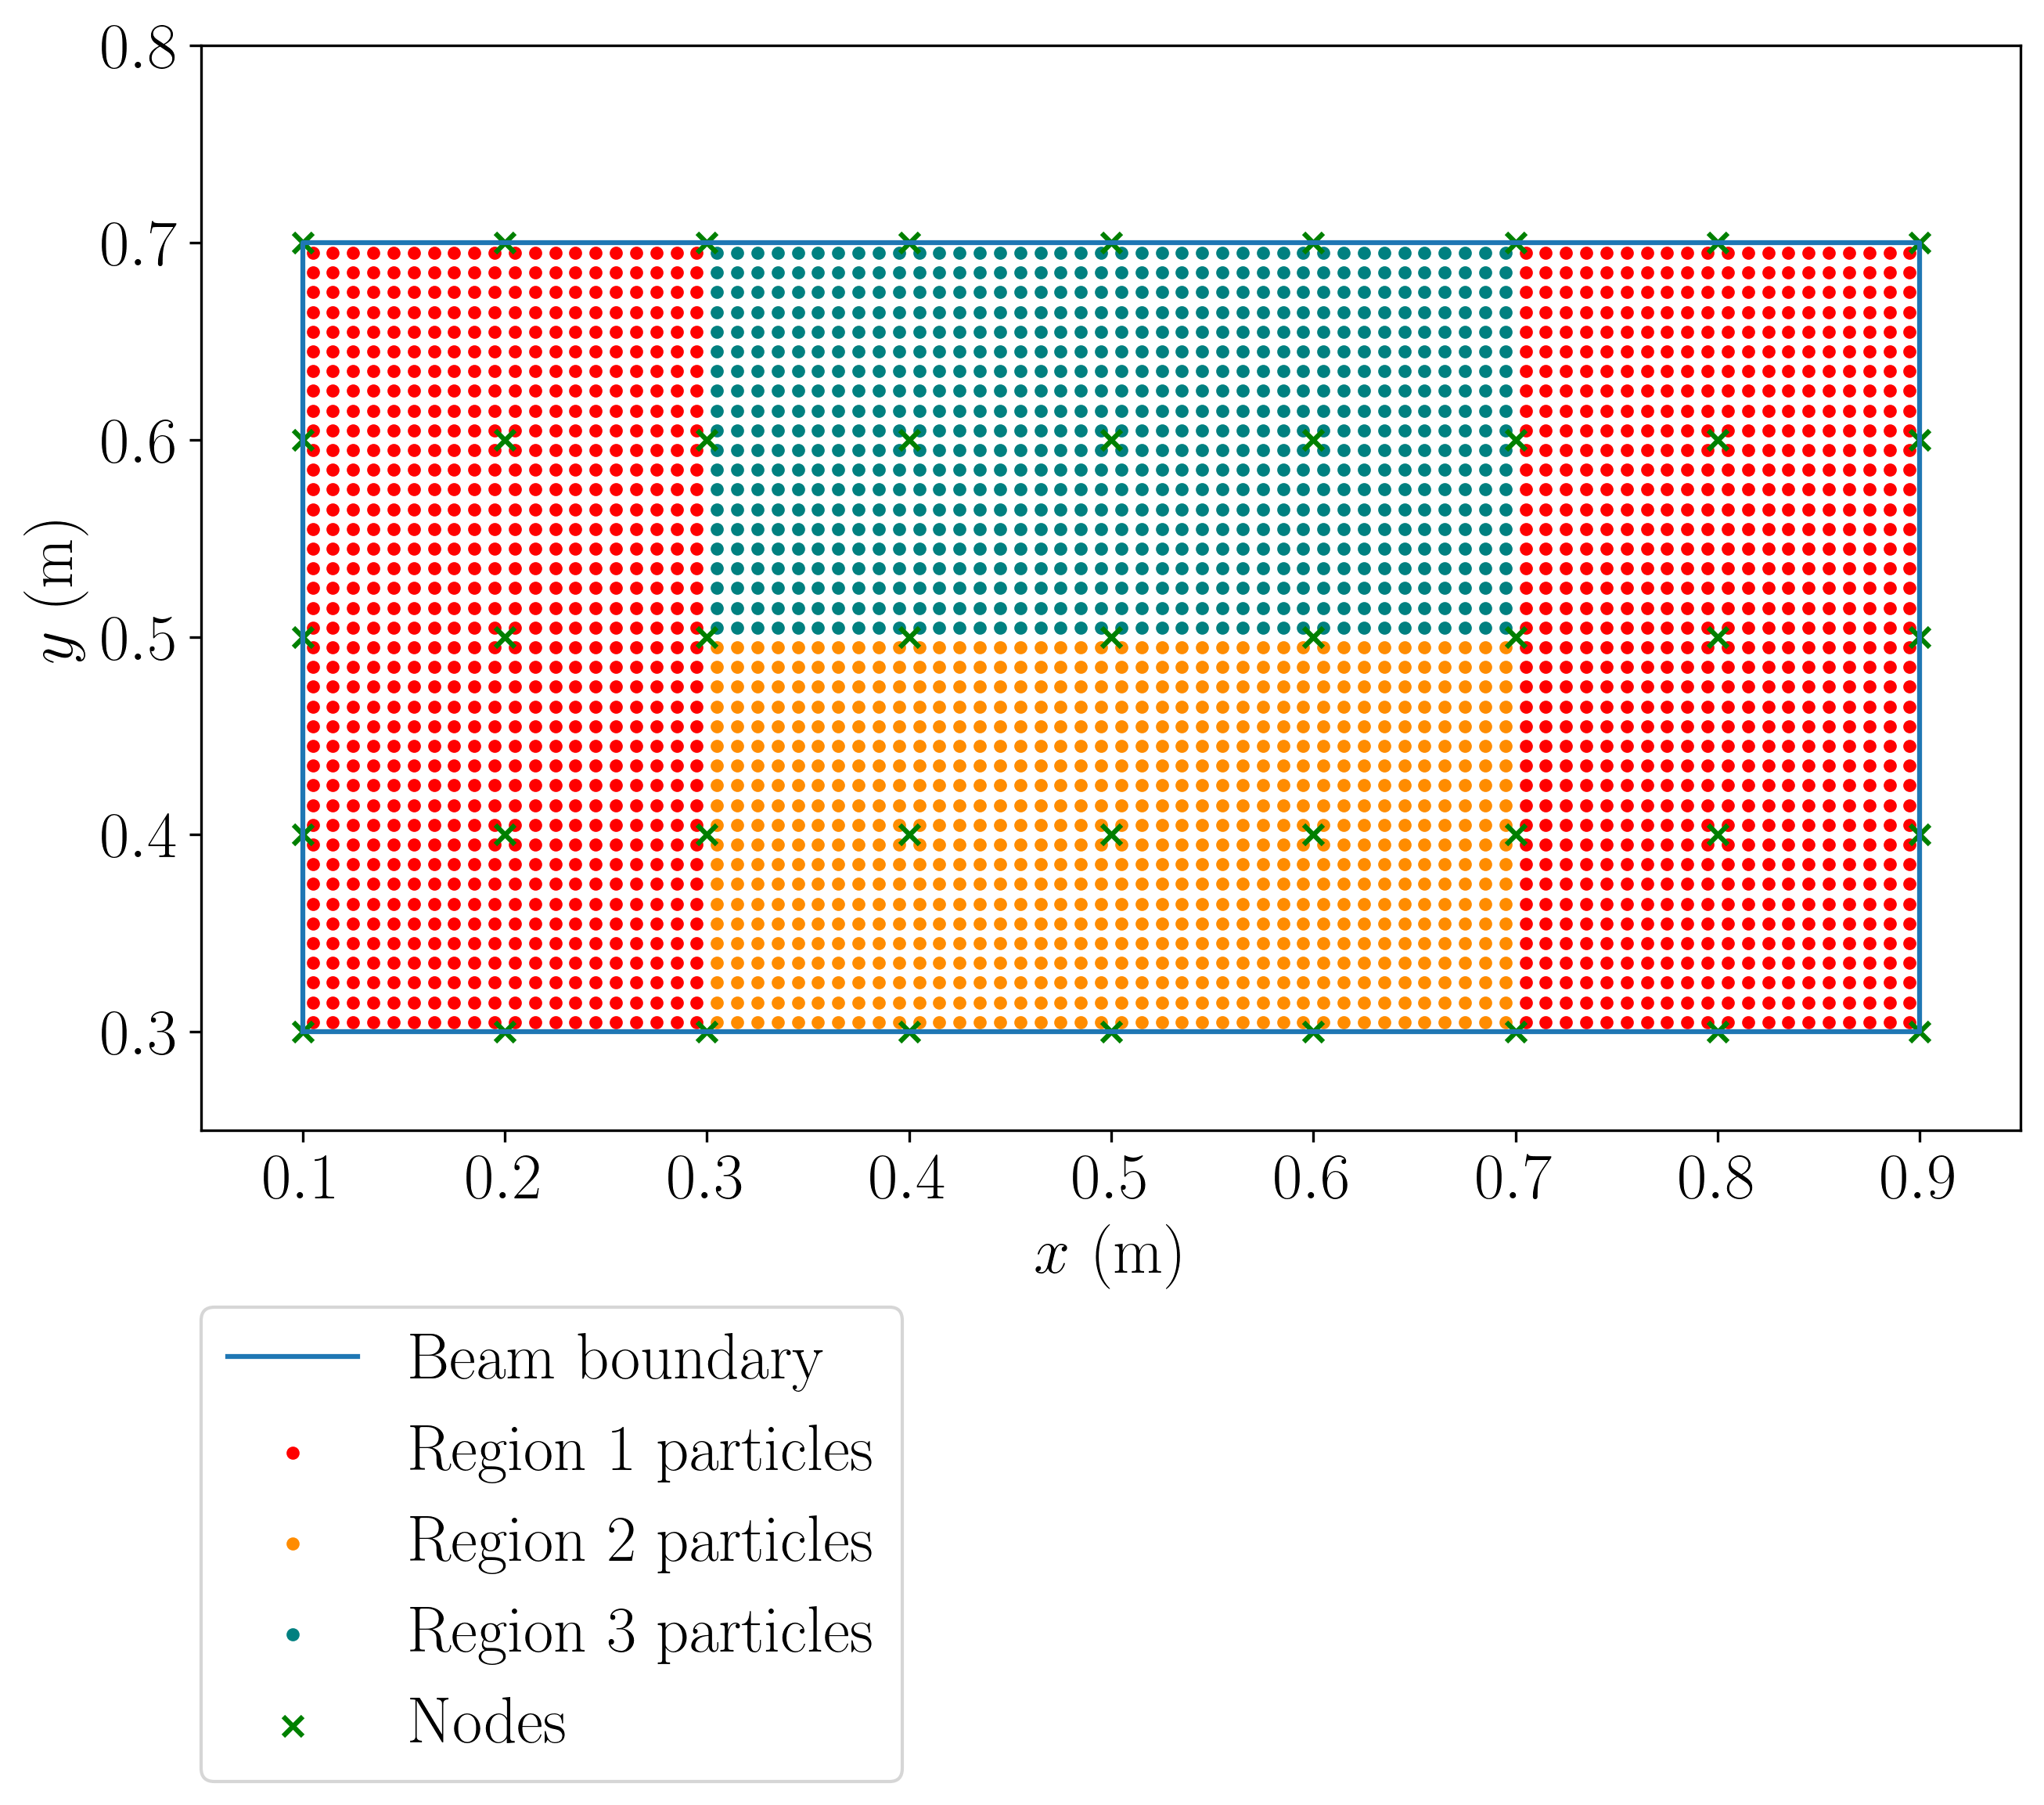

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Nx = 80
Ny = 40
x = np.zeros(Nx*Ny)
y = np.zeros(Nx*Ny)
x_n, y_n = np.meshgrid(np.arange(9)*0.1 + 0.1, np.arange(5)*0.1 + 0.3)
for i in range(Nx):
    for j in range(Ny):
        x[j * Nx + i] = (i)/(Nx) * 0.8 + 0.1 + 0.8 / Nx * 0.5
        y[j * Nx + i] = (j)/(Ny) * 0.4 + 0.3 + 0.4 / Ny * 0.5
n_particles = Nx * Ny
x_1, y_1 = np.array([]), np.array([])
x_2, x_3 = np.array([]), np.array([])
y_2, y_3 = np.array([]), np.array([])

for i in range(n_particles):
    col = i % Nx
    if col < 20 or col >= 60:
        x_1 = np.append(x_1, x.flatten()[i])
        y_1 = np.append(y_1, y.flatten()[i])
    else:
        if i < n_particles * 0.5:
            x_2 = np.append(x_2, x.flatten()[i])
            y_2 = np.append(y_2, y.flatten()[i])
        else:
            x_3 = np.append(x_3, x.flatten()[i])
            y_3 = np.append(y_3, y.flatten()[i])

matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 20}

matplotlib.rc('font', **font)
# plt.rcParams["text.usetex"] = False
plt.figure(figsize=(10,6))
plt.plot([0.1, 0.1, 0.9, 0.9, 0.1], [0.3, 0.7, 0.7, 0.3, 0.3], label='Beam boundary')
plt.scatter(x_1, y_1, color='r', marker = '.', label='Region 1 particles')
plt.scatter(x_2, y_2, color='darkorange', marker = '.', label='Region 2 particles')
plt.scatter(x_3, y_3, color='teal', marker = '.', label='Region 3 particles')
plt.scatter(x_n, y_n, color='g', marker='x', label='Nodes')
plt.legend(loc=(0, -.6))
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.xlim([0.05, 0.95])
plt.ylim([0.25, 0.8])
# plt.legend(loc=(0,-0.6))
plt.show()

In [15]:
y_1.shape

(1600,)